In [1]:
#https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

import matplotlib.pyplot as plt

data = pd.read_csv('sentiment.csv')
# Keeping only the neccessary columns
data = data['text']

In [3]:
n_samples = 1000

In [4]:
len(data)

13871

In [5]:
#perform doc2vec embeddings on comments with gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [6]:
sample_data = data[:n_samples]

In [7]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(sample_data)]

In [8]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('{0}'.format(epoch), end =" ")
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 Model Saved


In [9]:
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize("hello how are you".lower())
v1 = model.infer_vector(test_data)
print("inferred docvector for 'hello how are you': ", v1)

print("most similar docvectors to '1': ",model.dv.most_similar('1'))

print("docvector of '1': ",model.dv['1'])

inferred docvector for 'hello how are you':  [-0.01093568 -0.02517842  0.00999209  0.09974901 -0.05318025 -0.04517379
  0.07879269  0.05937317 -0.22671673  0.128127   -0.01142383 -0.06740297
  0.08196397  0.02540892  0.21912651  0.08684789  0.19351323 -0.07920938
 -0.1967826  -0.12773986]
most similar docvectors to '1':  [('476', 0.8770961761474609), ('931', 0.7612701654434204), ('97', 0.7357650995254517), ('507', 0.7257499098777771), ('809', 0.7202396392822266), ('115', 0.7183747887611389), ('628', 0.7028269171714783), ('614', 0.6956087350845337), ('982', 0.6948331594467163), ('513', 0.6925621032714844)]
docvector of '1':  [-1.943649    3.599486    3.6807935   5.4406576   2.2317433   0.45629153
 -2.156084   -2.4291666  -2.5245001   4.129967    4.2478714  -2.5440607
 -6.059978    2.5063508   0.98665833 -0.6410516   7.6319985  -1.8832783
 -4.286602   -5.9271917 ]


In [10]:
doc_vectors = {doc:model.infer_vector(word_tokenize(doc.lower())) for doc in sample_data}

In [11]:
list(doc_vectors.values())[0]

array([ 0.10144184, -0.0740272 ,  0.24806914,  0.07146117, -0.10649122,
       -0.04267068,  0.07456367,  0.4494723 , -0.46323976,  0.00228308,
        0.17992054, -0.12405336,  0.2996286 ,  0.01202753,  0.3043759 ,
        0.27195317,  0.42608157, -0.14375515, -0.4619377 , -0.34653863],
      dtype=float32)

In [12]:
#perform k-means clustering on embedded documents

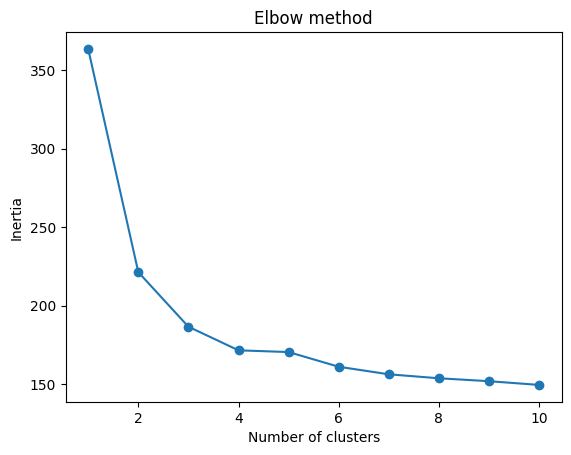

In [13]:
from sklearn.cluster import KMeans

data = list(doc_vectors.values())
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [14]:
num_clusters = 3
cluster_labels = [i for i in range(num_clusters)]

In [15]:
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)

KMeans(n_clusters=3)

In [16]:
#find centroids. compute bigram closest to centroid

In [17]:
centroids  = kmeans.cluster_centers_; centroids

array([[ 0.07162865, -0.08144694,  0.39635229,  0.23019311, -0.18745087,
        -0.05855303,  0.22600641,  0.54565825, -0.658358  ,  0.18574067,
         0.31849447, -0.28048017,  0.39994961,  0.10292997,  0.40300485,
         0.39128035,  0.72441235, -0.16893462, -0.56171535, -0.62577565],
       [ 0.0466008 , -0.04651272,  0.2645767 ,  0.14685066, -0.13740615,
        -0.04052044,  0.15098689,  0.35631488, -0.45009314,  0.12517419,
         0.21968211, -0.17094531,  0.27081716,  0.06119721,  0.26921888,
         0.27304718,  0.49747215, -0.11952982, -0.39348492, -0.4258504 ],
       [ 0.006357  , -0.0203245 ,  0.13958869,  0.07988218, -0.07945532,
        -0.01043335,  0.08096102,  0.18471944, -0.23469152,  0.05862359,
         0.11816453, -0.09213737,  0.14915196,  0.03463868,  0.13967008,
         0.15609062,  0.26364582, -0.06039792, -0.21163102, -0.22378291]])

In [18]:
#compute distances between centroids
centroid_dists = sum([[np.linalg.norm(centroids[i]-centroids[j]) for j in range(i+1,num_clusters)] for i in range(num_clusters)],[]); centroid_dists

[0.5583719386356361, 1.11064563606548, 0.5535436983146915]

In [19]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_fit = pca.fit_transform(list(doc_vectors.values()))

explained_variance = pca.explained_variance_ratio_

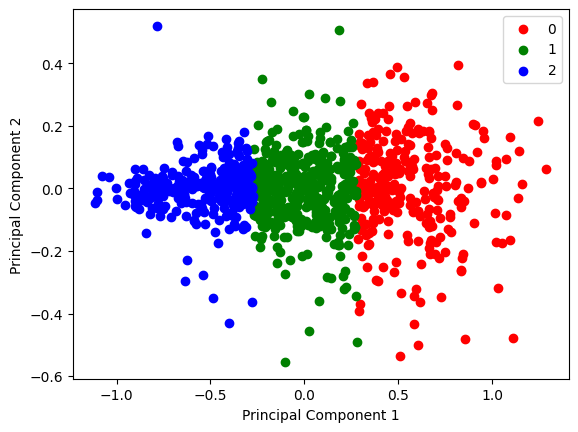

In [20]:
# plot the first two principal components with labels
pca_labeled = list(zip(pca_fit,kmeans.labels_))
colors = ["r", "g", "b"]
labels = ["Class 1", "Class 2", "Class 3"]
for label, color in zip(cluster_labels, colors):
    pca_fit_label = [pt[0] for pt in pca_labeled if pt[1] == label]
    pca_fit_i_x = np.array(pca_fit_label).transpose()[0]
    pca_fit_i_y = np.array(pca_fit_label).transpose()[1]
    plt.scatter(pca_fit_i_x, pca_fit_i_y, color=color, label=label)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [141]:
#a selection of poliical words 
poltical_keywords = list(pd.read_csv("political_keywords.csv"))

In [23]:
#create unique bigrams from list of political words
bigrams = []
for i in range(len(political_keywords)):
    for j in range(i+1,len(political_keywords)):
        bigrams.append(political_keywords[i] + " " + political_keywords[j])

In [24]:
bigram_vecs = {bigram:model.infer_vector(word_tokenize(bigram.lower())) for bigram in bigrams}

In [25]:
list(bigram_vecs.values())[0]

array([ 0.03068827,  0.00783652,  0.03330195, -0.01333172, -0.04536368,
        0.00836253,  0.03624764,  0.05635003, -0.01183031,  0.01720718,
        0.03898357, -0.05120905,  0.013877  , -0.03082242,  0.0161437 ,
        0.04203874,  0.05828208,  0.03356481, -0.10064623,  0.00222544],
      dtype=float32)

In [26]:
#define cosine similarity
from numpy.linalg import norm
def similarity(v,w):
    return np.dot(v,w)/(norm(v)*norm(w))

In [27]:
#find closest bigram to centroid
nearest_bigram_to_centroid = []
for centroid in centroids:
    min_dist = 2
    nearest_bigram = ""
    for bigram, embedding in bigram_vecs.items():
        dist = similarity(centroid, embedding)
        if dist < min_dist:
            min_dist = dist
            nearest_bigram = bigram
    nearest_bigram_to_centroid.append((nearest_bigram,min_dist))

In [28]:
nearest_bigram_to_centroid

[('state budget', -0.7256295815096273),
 ('state budget', -0.7257883863369732),
 ('state budget', -0.7317479665962369)]

In [124]:
#label the data with the appropriate label from k-means clustering
labeled_data = list(zip(sample_data,kmeans.labels_))

In [125]:
#separate documents by label. build vocabulary for each cluster
cluster_vocab = [[] for label in cluster_labels]
cluster_docs = [[] for label in cluster_labels]
for doc, label in labeled_data:
    cluster_vocab[label] += word_tokenize(doc.lower())
    cluster_docs[label].append(doc)

In [123]:
#METHOD 2) use word embeddings to compute distance from word to list of words, take closest words

In [34]:
import spacy
nlp=spacy.load("en_core_web_lg")

In [35]:
nlp("hello").similarity(nlp("hi"))

0.5797264417406982

In [36]:
#define function which measures distance to a set of words using word embeddings and cosine similarity
def dist_to_wordset(keyword,wordset):
    return min([nlp(keyword).similarity(nlp(word)) for word in wordset])

In [37]:
dist_to_wordset(political_keywords[0],cluster_vocab[0])

/var/folders/4d/rp7dhwss6znf18sks0v304d80000gn/T/ipykernel_2309/4047510694.py:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return min([nlp(keyword).similarity(nlp(word)) for word in wordset])


-0.263570855730982

In [38]:
#compute the political keyword with the closest distance
#this is essentially computing the Hausdorff distance between these two sets
def closest_keyword(keywords,wordset):
    max_dist = -2
    max_keyword = ""
    for keyword in keywords:
        dist = dist_to_wordset(keyword,wordset)
        if dist > max_dist:
            max_dist = dist
            max_keyword = keyword
    return (max_keyword,max_dist)

In [39]:
closest_keyword(political_keywords[:3],cluster_vocab[0])

/var/folders/4d/rp7dhwss6znf18sks0v304d80000gn/T/ipykernel_2309/4047510694.py:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return min([nlp(keyword).similarity(nlp(word)) for word in wordset])


('republic', -0.2577690642582492)

In [132]:
#METHOD 3: Use TF-IDF on each cluster to extract top two words
from sklearn.feature_extraction.text import TfidfVectorizer
def top_words_in_cluster(cluster_index,num_words=10):
    tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word',stop_words='english')
    corpus_tfidf = tfidf_vectorizer.fit_transform(cluster_docs[cluster_index])
    tfidf_df = pd.DataFrame(corpus_tfidf.toarray(), columns = tfidf_vectorizer.get_feature_names_out())
    tfidf_scores = tfidf_df.sum(axis=0)
    return tfidf_scores.nlargest(n=num_words)

In [135]:
top_words_in_cluster(0)

http          8.911828
trump         7.634697
night         6.126324
megynkelly    5.726789
like          5.245630
amp           4.985046
just          4.911455
foxnews       4.557967
did           4.496889
https         4.479784
dtype: float64